In [ ]:
##THINGS TO DO
#do more things with the dataset (can do on Monday) [words cluster, and word frequency ecc...]
#evaluate the model
#ask questions about the characters we deleted out of the corpus

In [7]:
!pip install keras
!pip install Tensorflow
!pip install wordcloud

In [8]:
##look more into detials how to import the ones in #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import random
import keras
import io
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adamax                ##cannot import it, does not work but it is solved
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")

In [45]:
import os.path

filename = input("name of the file: ")
print(os.path.abspath(filename))

name of the file: rap_all.csv
C:\Users\Patpa\Downloads\rap_all.csv


In [49]:
data = pd.read_csv("C:/Users/Patpa/Downloads/rap_all.csv")
data.head()

,rapper,text
0,Action Bronson,NaN
1,Action Bronson,Heartbreak drowned sorrows in a large steak
2,Action Bronson,NaN
3,Action Bronson,Why you always all on my back?
4,Action Bronson,Why you gotta do me like that?


In [50]:
#Artists in the dataset
print("Artists in the data:\n",data.rapper.value_counts())

Artists in the data:
 Tupac                 26231
Eminem                 6975
Kendrick Lamar         5896
The Notorious BIG      5720
Montana of 300         5603
Lupe Fiasco            5529
Logic                  5490
Royce Da 59            5403
J Cole                 5148
Nas                    5124
Kanye West             5056
Ice Cube               5033
Lil Wayne              4980
Tyler The Creator      4954
Childish Gambino       4919
Big L                  4808
Eazy-E                 4801
Jay-z                  4692
Joey Badass            4654
Talib Kweli            4633
Scarface               4536
Common                 4435
NF                     4415
Immortal Technique     4268
Drake                  4245
Mac Miller             4225
Chance The Rapper      4154
Pusha-T                3973
ASAP Rocky             3953
Deniro Farrar          3895
CunninLynguists        3760
Bas                    3492
Action Bronson         3415
Isaiah Rashad          3165
Earl Sweatshirt        259

In [51]:
##Size of the dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (186629, 2)


In [52]:
#take this from assignment 3
##splitting the data into a train and validation set by splitting it into 80% fro training and 20% for validation 

training_data = data.sample(frac=0.8, random_state=25)
testing_data = data.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 149303
No. of testing examples: 37326


In [53]:
data.describe()

,rapper,text
count,186629,172836
unique,37,141189
top,Tupac,Yeah
freq,26231,136


In [96]:
##look into it
# remove non-english
#raptext = lapply(rap.text, iconv, "UTF-8", "ASCII", sub="")

NameError: name 'lapply' is not defined

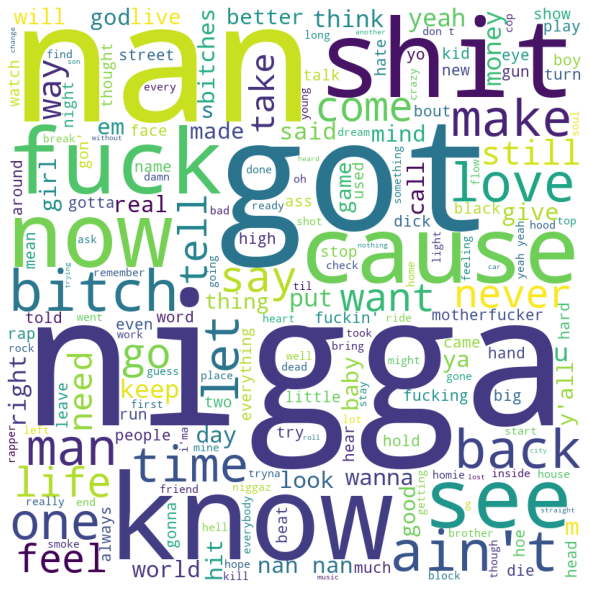

In [54]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in data.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [55]:
##some things in the data set are floats, solved
#Building the Corpus
text = str(data.text)
Corpus =''
for listitem in text:
    Corpus += listitem
    
Corpus = Corpus.lower() #converting all alphabets to lowecase 
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 39


In [56]:
## See all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'w', 'x', 'y']


In [16]:
to_remove = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', 
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]
for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")

NameError: name 'Corpus' is not defined

In [15]:
##Getting rid of all the non useful characters, might look more into it 
#Corpus = re.sub("[^A-Za-z0-9'\.\n]","",Corpus)

print("The unique characters:",sorted(set(Corpus)))

NameError: name 'Corpus' is not defined

In [14]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

NameError: name 'Corpus' is not defined

In [13]:
##ask questions on Monday
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

NameError: name 'L_corpus' is not defined

In [12]:
##ask questions on Monday
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)

NameError: name 'features' is not defined

In [6]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#Model's Summary               
model.summary()

NameError: name 'X' is not defined

In [11]:
#Training the Model
history = model.fit(X, y, batch_size=128, epochs=200)

NameError: name 'X' is not defined

[Text(0.5, 0, 'Epochs')]

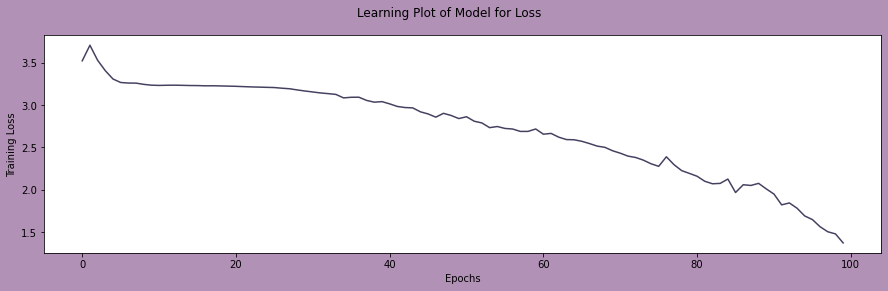

In [82]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings 

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")